In [ ]:
# this is the whole project

In [ ]:
# get the dir

In [144]:
getwd()

[1] "/home/senlyu/case/data"

In [ ]:
# set the dir

In [1]:
setwd('/home/senlyu/case/data')

In [281]:
train.file <- paste0('/home/senlyu/case/data/', 'training.csv')
data <- read.csv(train.file, stringsAsFactors=F)

In [ ]:
# random all the data

In [282]:
data_new = data[sample(nrow(data),size=dim(data)[1],replace=TRUE),]

In [283]:
dim(data_new)

[1] 7049   31

In [285]:
# train-validation-test split
# both validation, test are set to 700
# careful with the len

In [286]:
train.len = dim(data_new)[1]-1400
validation.len = 700
test.len = 700
to.train = data_new[1:train.len,]
to.validation = data_new[(train.len+1):(train.len+validation.len),]
to.test = data_new[(train.len+validation.len+1):(train.len+validation.len+test.len),]

In [ ]:
# change the data into good form
# im.train[i,j,k] = the value of, the number i image, the j row, the k col
# or you can see it in this way. number i image is in im.train[i,,]

# the traget is lb.train
# the each feature has (x,y). 
# for each i image, j feature, x=lb.train[i,j], y=lb.train[i,j]

In [287]:
trainimage = to.train$Image
to.train$Image = NULL
lb.train = to.train
im.train = array(0,dim = c(length(trainimage),96,96))
for (i in (1:length(trainimage)))
{
    im.intlize = as.integer(unlist(strsplit(trainimage[i], " ")))
    im.add = matrix(data=rev(im.intlize),nrow=96,ncol=96)
    for (j in 1:96)
        for (k in 1:96)
            {
            im.train[i,j,k] = im.add[j,k]
        }
    
}

In [288]:
validationimage = to.validation$Image
to.validation$Image = NULL
lb.validation = to.validation
im.validation = array(0,dim = c(length(validationimage),96,96))
for (i in (1:length(validationimage)))
{
    im.intlize = as.integer(unlist(strsplit(validationimage[i], " ")))
    im.add = matrix(data=rev(im.intlize),nrow=96,ncol=96)
    for (j in 1:96)
        for (k in 1:96)
            {
            im.validation[i,j,k] = im.add[j,k]
        }
    
}

In [289]:
testimage = to.test$Image
to.test$Image = NULL
lb.test = to.test
im.test = array(0,dim = c(length(testimage),96,96))
for (i in (1:length(testimage)))
{
    im.intlize = as.integer(unlist(strsplit(testimage[i], " ")))
    im.add = matrix(data=rev(im.intlize),nrow=96,ncol=96)
    for (j in 1:96)
        for (k in 1:96)
            {
            im.test[i,j,k] = im.add[j,k]
        }
    
}


In [ ]:
# here are the example

In [18]:
imtrain = matrix(im.train[3,,],nrow = 96, ncol = 96)
imvalidation = matrix(im.validation[1,,],nrow = 96, ncol = 96)
imtest = matrix(im.test[1,,],nrow = 96, ncol = 96)

[1] 29.172

[1] 57.62573

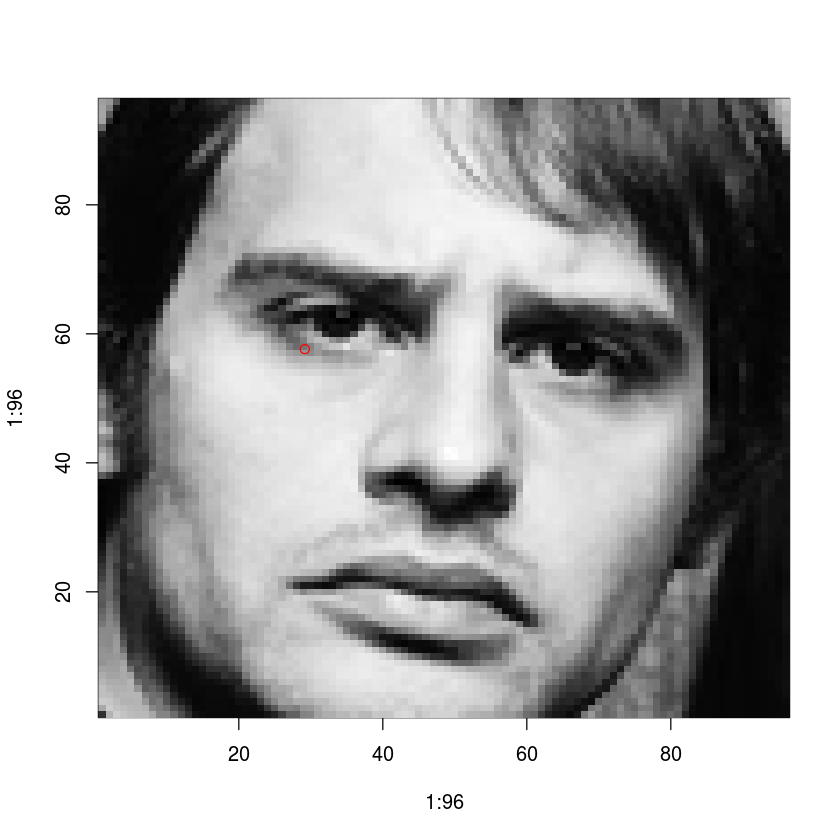

In [19]:
image(1:96,1:96,imtrain,col=gray((0:255)/255))
points(96-lb.train[1,1],         96-lb.train[1,2],         col="red")
96-lb.train[1,1]
96-lb.train[1,2]

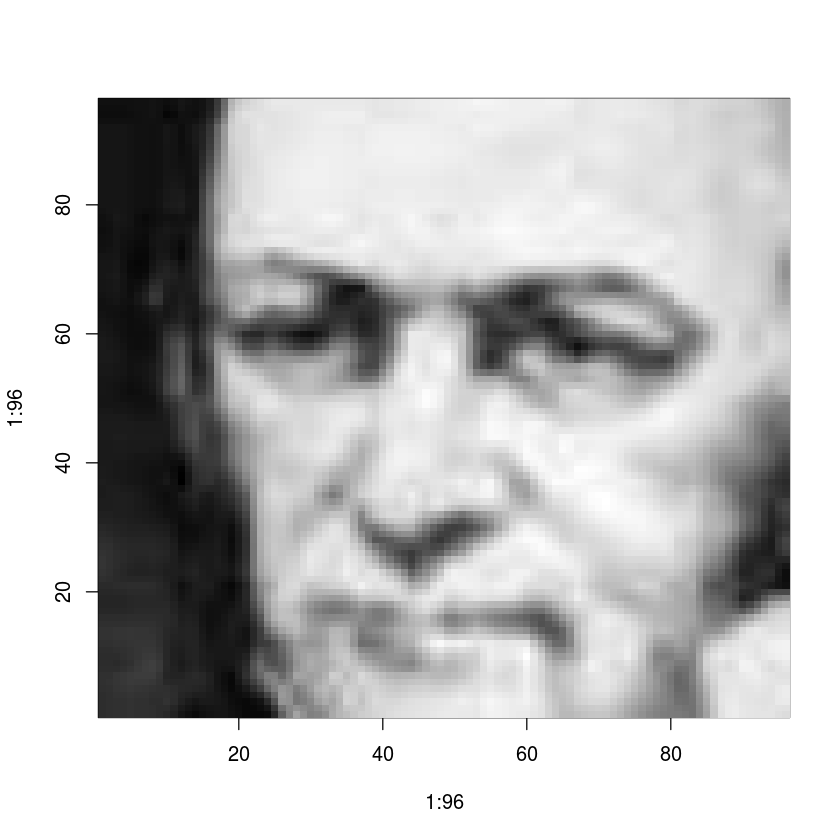

In [292]:
image(1:96,1:96,imvalidation,col=gray((0:255)/255))

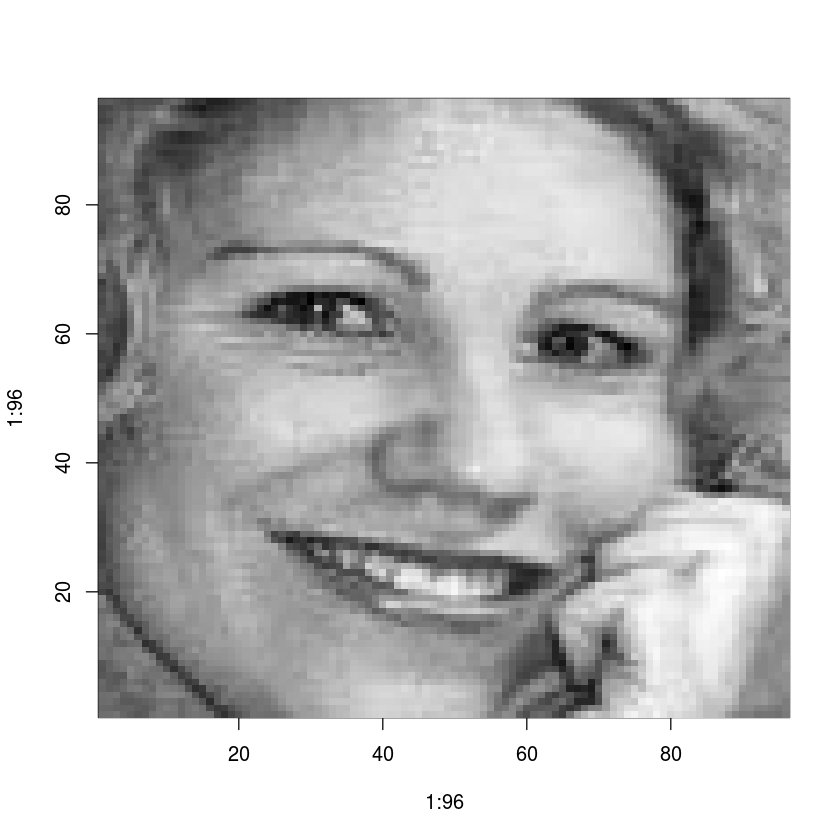

In [293]:
image(1:96,1:96,imtest,col=gray((0:255)/255))

In [ ]:
# save the data

In [294]:
save(im.train, lb.train, im.validation, lb.validation, im.test, lb.test, file = 'newdata.Rd')

In [2]:
load('newdata.Rd')

In [ ]:
# this is how we build the model
# matrixoffeature is a 4-dimensional array
# for the image i, feature j, the 21*21 feature part are in the matrixoffearture[i,j,,]

# if the postion_x or y is out of range, we set it to NA
# if the lb.train[i,j] is NA then we set matrixoffearture[i,j,,] also NA

In [3]:
matrixoffeature = array(0,dim=c(dim(lb.train)[1], dim(lb.train)[2]/2, 21, 21))

for (i in 1:(dim(lb.train)[1])){
    for (j in 1:(dim(lb.train)[2]/2))
        {
        for (k in 1:21)
            for (l in 1:21){
                postion_x = 96 - round(lb.train[i,2*j-1] - k + 11)
                postion_y = 96 - round(lb.train[i,2*j] - l + 11)
                flag = (postion_x<1)|(postion_x>96)|(postion_y<1)|(postion_y>96)
                if (is.na(postion_x)|is.na(postion_y)){
                        flag = TRUE
                }
                if (is.na(flag)) {
                    matrixoffeature[i,j,k,l] = NA
                }else if (flag){
                    matrixoffeature[i,j,k,l] = NA
                    } else {
                    matrixoffeature[i,j,k,l] = im.train[i,postion_x,postion_y]
                }
            }
        }
}
    


In [4]:
matrixoffeature[1,1,,]

130,130,133,141,148,148,147,141,128,117,⋯,98,96,96,96,94,91,85,78,74,73
143,143,145,151,156,153,149,140,125,111,⋯,92,91,94,96,94,93,89,84,83,84
154,154,156,159,162,157,150,139,122,106,⋯,86,86,92,95,94,94,92,89,90,93
163,163,163,164,164,156,147,135,115,98,⋯,79,81,89,93,94,94,93,92,94,100
173,173,171,169,166,157,145,130,108,89,⋯,73,77,85,91,93,95,95,96,100,108
177,176,174,171,168,157,144,128,104,84,⋯,69,73,83,90,92,95,96,98,103,113
178,176,175,173,171,159,143,126,101,80,⋯,67,72,82,90,93,96,98,100,106,118
181,180,178,175,172,159,143,125,98,76,⋯,62,67,79,87,91,95,98,101,108,120
190,190,187,179,172,158,142,123,96,73,⋯,52,57,71,81,87,93,94,96,104,120
199,199,195,183,172,158,141,122,94,70,⋯,43,48,63,74,82,90,91,92,100,119
203,201,197,187,177,161,143,123,94,69,⋯,42,49,64,76,86,95,97,98,106,125


In [20]:
im = matrix(matrixoffeature[3,2,,],nrow = 21, ncol = 21)
image(1:21,1:21,im,col=gray((0:255)/255))

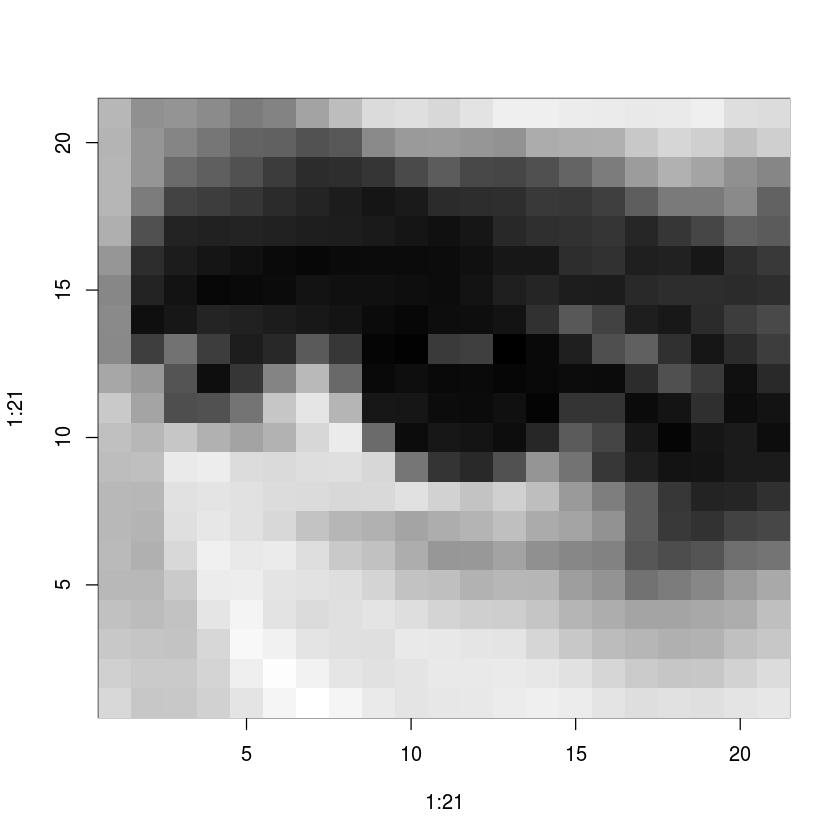

In [17]:
save(matrixoffeature,file='features.Rd')

In [ ]:
# this is our model
# get the mean[j]
# mean[j,,] is 21*21 part of the mean of all the feature j
# if matrixoffeature[i,j,,] is not NA, we add to get the mean[j,,]

In [38]:
j_len = dim(lb.train)[2]/2
mean = array(0, dim=c(j_len,21,21))
for (j in (1:j_len))
    {
    for (ii in 1:21)
        for (jj in 1:21){
            mean[j,ii,jj] = 0
        }
    for (i in 1:(dim(lb.train)[1])){
        for (k in 1:21)
            for (l in 1:21){
                if (!is.na(matrixoffeature[i,j,k,l])){
                    mean[j,k,l] = mean[j,k,l]*(i-1)/i+matrixoffeature[i,j,k,l]/i
                }
                
            }
        
    }
}


In [32]:
save(mean,file='features.Rd')

In [ ]:
# this is for you to see how the feature is
# change the featurenum u like to see the average feature

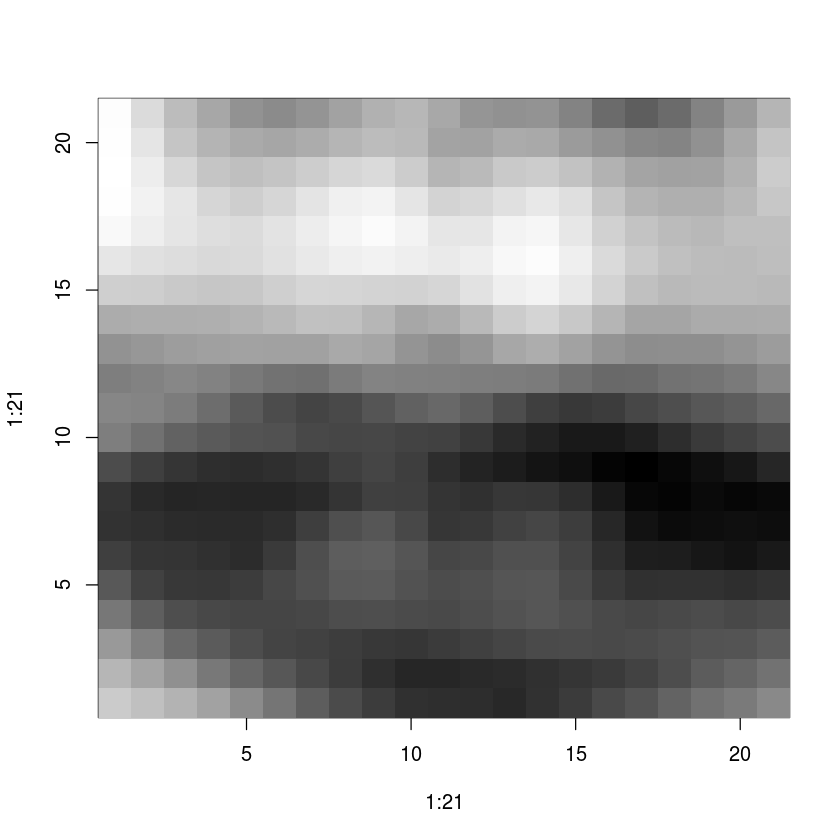

In [37]:
featurenum = 14
im = matrix(mean[featurenum,,],nrow = 21, ncol = 21)
image(1:21,1:21,im,col=gray((0:255)/255))

In [ ]:
# this is the prediction function
# we use cor to get score and return the highest score

In [114]:
predictions = function(image, featurenumber){
    dimx = dim(image)[1]
    dimy = dim(image)[2]
    maxscore = 0
    maxx = 0
    maxy = 0
    
    for (i in (1:(dimx-21)))
        for (j in (1:(dimy-21))){
            compareimage = image[i:(i+20),j:(j+20)]
            A = as.vector(mean[featurenumber,,])
            B = as.vector(compareimage[,])
            #la = length(A)
            #lb = length(B)
            score = cor(A,B)
            if (score > maxscore) {
                maxscore = score
                maxx = i
                maxy = j
            }
            
        }
    
    return(c(maxscore,maxx,maxy))
    #return(c(la,lb))
    
}

In [ ]:
# this is how our model works
# change the numofpci as the different pic in the test dataset
# change the feature u want to test
# the red is label
# the green is prediction

[1] 0.767376

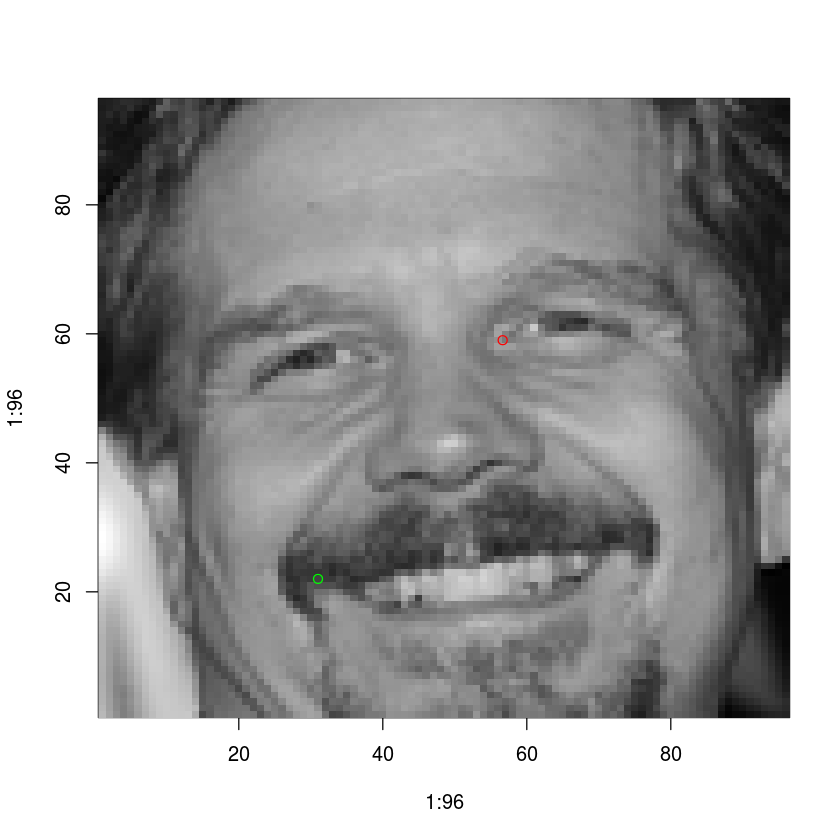

In [143]:
numofpci = 30
numoffeature = 5
im = matrix(im.test[numofpci,,],nrow = 96, ncol = 96)
image(1:96,1:96,im,col=gray((0:255)/255))
points(96-lb.test[numofpci,2*numoffeature-1],         96-lb.test[numofpci,2*numoffeature],         col="red")
p = predictions(im.test[numofpci,,],numoffeature)
a = c(p[2]+11,p[3]+11)
points(a[1],         a[2],         col="green")
p[1]